In [1]:
import fiona
from shapely import geometry, wkt
from shapely.geometry import shape
from shapely.ops import transform

import json
import geojson

from functools import partial
import pyproj
import utm

In [2]:
## awkward hack to import local modules in Jupyter
import sys
sys.executable
sys.path.append('/mnt/bigdata/frontierSI/qa4mbes-data-pipeline/qa4mbes')

In [3]:
with fiona.open("../tests/testcoverage.shp") as shapefile:
    geometry = shapefile[0]["geometry"]
    print(shapefile[0])

{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('id', 0)]), 'geometry': {'type': 'Polygon', 'coordinates': [[(148.52130039229576, -41.824085859822155), (148.52847609278288, -41.82379242969071), (148.52934304544397, -41.826379949940716), (148.5223273977558, -41.82779374966494), (148.5196865265728, -41.82603316887628), (148.52130039229576, -41.824085859822155)]]}}


In [4]:
geometry

{'type': 'Polygon',
 'coordinates': [[(148.52130039229576, -41.824085859822155),
   (148.52847609278288, -41.82379242969071),
   (148.52934304544397, -41.826379949940716),
   (148.5223273977558, -41.82779374966494),
   (148.5196865265728, -41.82603316887628),
   (148.52130039229576, -41.824085859822155)]]}

In [5]:
strgeom = str(json.dumps(geometry))

In [6]:
geometry = geojson.loads(strgeom)

In [7]:
refpoly = shape(geometry)

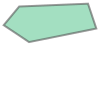

In [8]:
refpoly

In [9]:
import getpointcoverage

In [13]:
testcoverage = getpointcoverage.getpointcoverage("../tests/4819-100000lines.laz")

{'metadata': {'': [{}, {}], 'filters.hexbin': [{'area': 340774.8782, 'avg_pt_per_sq_unit': 10.22324635, 'avg_pt_spacing': 1.846008879, 'boundary': 'MULTIPOLYGON (((627030.10361568 5367969.84452038, 627024.24245590 5367979.99634692, 627016.42757619 5367979.99634692, 627012.52013633 5367983.38028910, 627018.38129612 5367986.76423128, 627025.21931587 5367981.68831801, 627033.03419558 5367981.68831801, 627035.96477547 5367986.76423128, 627031.08047565 5367988.45620237, 627025.21931587 5367985.07226019, 627027.17303579 5367991.84014455, 627018.38129612 5367996.91605782, 627006.65897655 5367996.91605782, 627010.56641641 5368000.30000000, 627027.17303579 5367998.60802891, 627030.10361568 5368003.68394218, 627013.49699630 5368001.99197109, 627003.72839666 5368008.75985545, 626997.86723688 5368008.75985545, 627001.77467673 5368012.14379763, 627007.63583651 5368008.75985545, 627033.03419558 5368008.75985545, 627035.96477547 5368013.83576872, 627025.21931587 5368012.14379763, 627021.31187601 5368

In [14]:
testcoverage

'{"type": "MultiPolygon", "coordinates": [[[[627030.10361568, 5367969.84452038], [627024.2424559, 5367979.99634692], [627016.42757619, 5367979.99634692], [627012.52013633, 5367983.3802891], [627018.38129612, 5367986.76423128], [627025.21931587, 5367981.68831801], [627033.03419558, 5367981.68831801], [627035.96477547, 5367986.76423128], [627031.08047565, 5367988.45620237], [627025.21931587, 5367985.07226019], [627027.17303579, 5367991.84014455], [627018.38129612, 5367996.91605782], [627006.65897655, 5367996.91605782], [627010.56641641, 5368000.3], [627027.17303579, 5367998.60802891], [627030.10361568, 5368003.68394218], [627013.4969963, 5368001.99197109], [627003.72839666, 5368008.75985545], [626997.86723688, 5368008.75985545], [627001.77467673, 5368012.14379763], [627007.63583651, 5368008.75985545], [627033.03419558, 5368008.75985545], [627035.96477547, 5368013.83576872], [627025.21931587, 5368012.14379763], [627021.31187601, 5368018.91168199], [627010.56641641, 5368017.2197109], [6270

In [12]:
refpoly.intersects(testcoverage.boundary)

AttributeError: 'str' object has no attribute 'boundary'

In [ ]:
refpoly.intersection(testcoverage)

In [ ]:
intersect = refpoly.intersection(testcoverage)

In [ ]:
refpoly.intersection(testgeom).area

In [ ]:
testgeom.centroid.to_wkt()

In [ ]:
refpoly.centroid.xy

In [ ]:
testpoly_coords = refpoly.centroid.xy

In [ ]:
testpoly_coords[1][0]

In [ ]:
utm.from_latlon(testpoly_coords[1][0], testpoly_coords[0][0])

In [ ]:
project = partial(
    pyproj.transform,
    pyproj.Proj(init='epsg:4326'), # source coordinate system
    pyproj.Proj(init='epsg:32755')) # destination coordinate system

In [ ]:
g2 = transform(project, refpoly)

In [ ]:
g2.area

In [ ]:
g3 = transform(project,intersect)

In [ ]:
g3.area

In [ ]:
g3.area / g2.area

In [ ]:
def transformtoutm(geometry):
    #lazily assume input geometry is latlon/EPSG:4326
    refpoint = geometry.centroid.xy
    utmzone = utm.from_latlon(refpoint[1][0], refpoint[0][0])

    if refpoint[1][0] > 0:
        epsgcode = 'epsg:326'+str(utmzone[2])
    else:
        epsgcode = 'epsg:327'+str(utmzone[2])
    # from: https://gis.stackexchange.com/questions/127427/transforming-shapely-polygon-and-multipolygon-objects
    project = partial(
        pyproj.transform,
        pyproj.Proj(init='epsg:4326'), # source coordinate system
        pyproj.Proj(init=epsgcode)) # destination coordinate system

    return transform(project, geometry)

In [ ]:
def intersectinmetres(refgeom, testgeom):
    """
    give two geometries which intersect, transform to utm,
    return area in square metres, and percent coverage
    """
    utmref = transformtoutm(refgeom)
    utmtest = transformtoutm(testgeom)

    intersection = utmref.intersection(utmtest)

    intersectionarea = intersection.area
    intersectionpercent = intersection.area / utmref.area

    return [intersectionarea, intersectionpercent]

In [ ]:
intersectinmetres(refpoly, testgeom)

In [ ]:
geojson.dumps(intersect)